<a href="https://colab.research.google.com/github/adithya7shankar/SnackSense/blob/main/Neural_net_chemisensor_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.utils import to_categorical


# Example: Load your dataset
df = pd.read_json('/content/drive/MyDrive/ChemisensorProject/Processeddata/ChemisensorDataV1.json')
# Assuming df is your DataFrame with the necessary columns

# Convert SensorOutput lists into a DataFrame where each entry becomes a column
sensor_output_df = pd.DataFrame(df['SensorOutput'].tolist())

# If you want to include SampleDeviceID as a feature, encode it
encoder = OneHotEncoder()
encoded_device_id = encoder.fit_transform(df[['SampleDeviceId']]).toarray()

# Combine the sensor output and encoded device IDs into one feature array
X = pd.concat([sensor_output_df, pd.DataFrame(encoded_device_id)], axis=1).values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# For y, if you're doing classification and PH values are categorical, use one-hot encoding
y = df['PH'].values
y = to_categorical(y)  # Only use if PH is a categorical target

print(df)

     SampleDeviceId  PH                                       SensorOutput
0            S1D1_2   4  [5.7756e-06, 6.7538e-06, 1.0038e-05, 1.0413e-0...
1            S1D1_3   4  [7.4094e-06, 7.1381e-06, 1.0598e-05, 1.05902e-...
2            S1D1_4   4  [7.9163e-06, 7.3885e-06, 1.0774e-05, 1.06971e-...
3            S1D1_5   4  [8.2705e-06, 7.5857e-06, 1.096e-05, 1.0799e-05...
4            S1D1_6   4  [8.4143e-06, 7.702e-06, 1.1e-05, 1.08556e-05, ...
...             ...  ..                                                ...
1220        S2D3_22  10  [5.5335e-06, 6.0419e-06, 1.1202e-05, 1.11094e-...
1221        S2D3_23  10  [5.5292e-06, 6.0334e-06, 1.121e-05, 1.11118e-0...
1222        S2D3_24  10  [5.5221e-06, 6.0304e-06, 1.1214e-05, 1.11141e-...
1223        S2D3_25  10  [5.5212e-06, 6.026e-06, 1.121e-05, 1.1116e-05,...
1224        S2D3_26  10  [5.5061e-06, 6.0226e-06, 1.1218e-05, 1.11173e-...

[1225 rows x 3 columns]


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu',  input_shape=(376,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Evaluate the model
model.evaluate(X_test_scaled, y_test)


Epoch 1/100
25/25 [==============================] - 6s 13ms/step - loss: 0.2927 - val_loss: 0.1755
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1345 - val_loss: 0.1536
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1097 - val_loss: 0.1080
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0916 - val_loss: 0.1066
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0876 - val_loss: 0.1030
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0854 - val_loss: 0.1012
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0843 - val_loss: 0.1006
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0838 - val_loss: 0.1009
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0836 - val_loss: 0.0999
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0832 - val_loss: 0.1011
Epoch 11

0.08666928112506866

Epoch 1/10
25/25 [==============================] - 2s 11ms/step - loss: 0.0933 - val_loss: 0.0850
Epoch 2/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0843 - val_loss: 0.0842
Epoch 3/10
25/25 [==============================] - 0s 19ms/step - loss: 0.0832 - val_loss: 0.0837
Epoch 4/10
25/25 [==============================] - 0s 18ms/step - loss: 0.0829 - val_loss: 0.0835
Epoch 5/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0828 - val_loss: 0.0834
Epoch 6/10
25/25 [==============================] - 0s 18ms/step - loss: 0.0828 - val_loss: 0.0834
Epoch 7/10
25/25 [==============================] - 0s 18ms/step - loss: 0.0827 - val_loss: 0.0833
Epoch 8/10
25/25 [==============================] - 1s 22ms/step - loss: 0.0827 - val_loss: 0.0832
Epoch 9/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0827 - val_loss: 0.0832
Epoch 10/10
25/25 [==============================] - 0s 20ms/step - loss: 0.0827 - val_loss: 0.0832


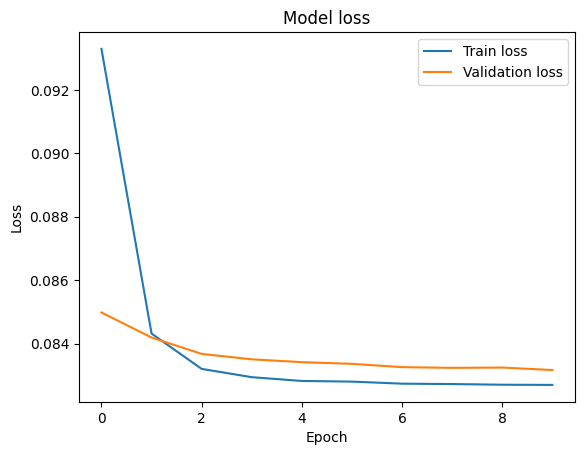

8/8 [==============================] - 0s 3ms/step


ValueError: x and y must be the same size

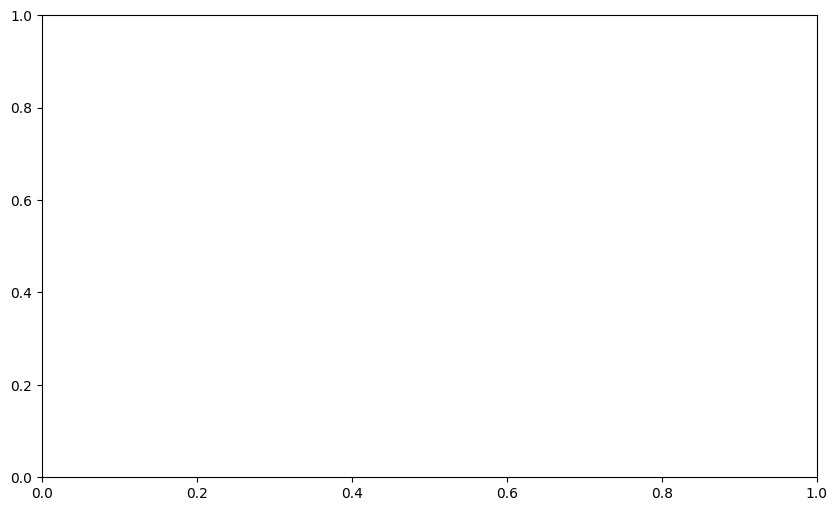

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(376,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and save the history
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, batch_size=32)


# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model
model.evaluate(X_test_scaled, y_test)

# Predicting the pH values
y_pred = model.predict(X_test_scaled)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title('Predicted pH vs. Actual pH')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) # A reference line for perfect predictions
plt.show()




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(376, input_shape=(376,), activation='relu'),  # Input layer with 2 inputs
    Dense(376, activation='relu'),  # Hidden layer
    Dense(y.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)




Epoch 1/100
28/28 [==============================] - 1s 11ms/step - loss: 1.4959 - accuracy: 0.3878 - val_loss: 1.1262 - val_accuracy: 0.5612
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.8731 - accuracy: 0.6440 - val_loss: 1.0008 - val_accuracy: 0.5612
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.6129 - accuracy: 0.7562 - val_loss: 0.9594 - val_accuracy: 0.5510
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.8186 - val_loss: 0.8830 - val_accuracy: 0.5816
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3610 - accuracy: 0.8537 - val_loss: 0.9523 - val_accuracy: 0.5510
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8571 - val_loss: 0.9197 - val_accuracy: 0.6020
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.2934 - accuracy: 0.8764 - val_loss: 0.8874 - val_accuracy: 0.6633
Epoch 8/100


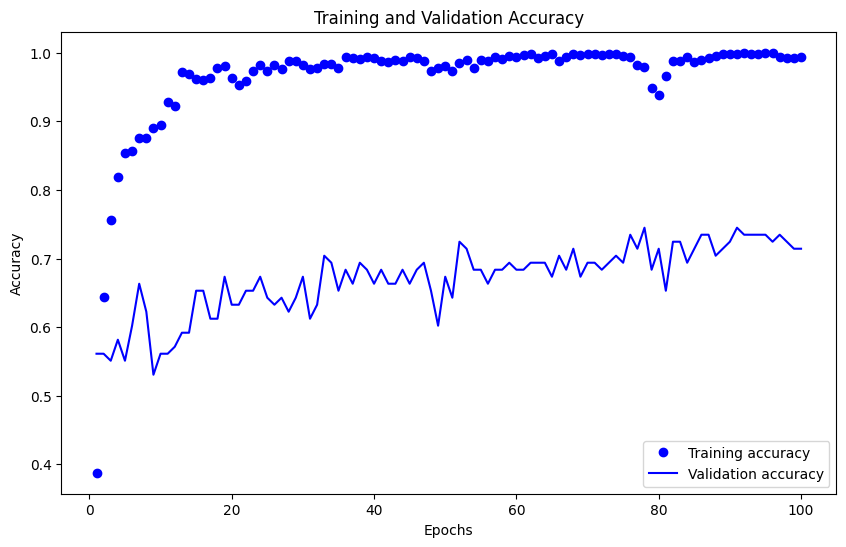

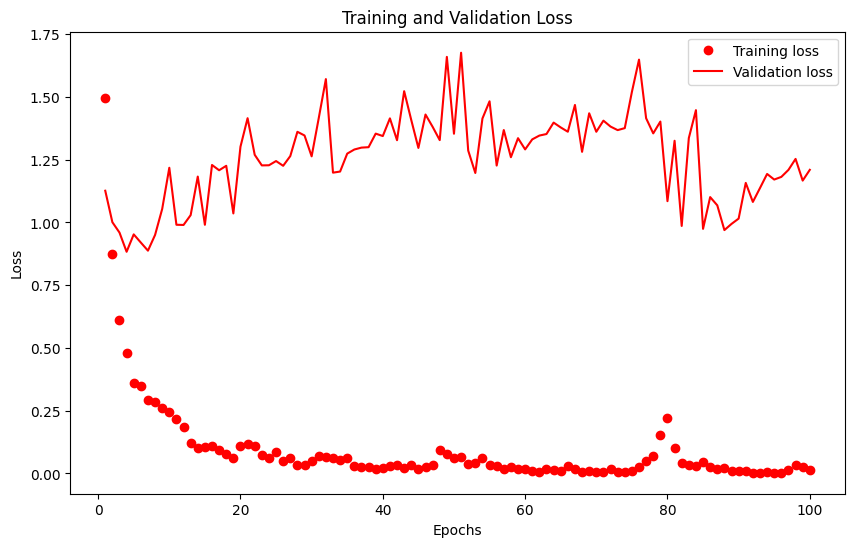

In [ ]:

# Extract accuracy history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

# Extract loss history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
